## 10-2. Boston 주택 가격 예측 모델

### 데이터 로드 및 전처리

In [100]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [101]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [102]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean
# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data/std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data- mean
test_data = test_data / std

### 모델 구성 및 컴파일

In [103]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

### 모델 학습

In [104]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data,train_labels, epochs=40, batch_size=16,validation_split=0.2)

Epoch 1/40
21/21 [==============================] - 1s 8ms/step - loss: 468.4200 - mae: 19.7471 - val_loss: 446.6577 - val_mae: 19.2832
Epoch 2/40
21/21 [==============================] - 0s 3ms/step - loss: 309.5721 - mae: 15.6123 - val_loss: 275.7502 - val_mae: 14.4886
Epoch 3/40
21/21 [==============================] - 0s 3ms/step - loss: 165.7769 - mae: 10.5818 - val_loss: 143.5609 - val_mae: 9.2289
Epoch 4/40
21/21 [==============================] - 0s 3ms/step - loss: 82.9680 - mae: 7.0135 - val_loss: 80.6326 - val_mae: 6.5393
Epoch 5/40
21/21 [==============================] - 0s 3ms/step - loss: 50.6252 - mae: 5.2917 - val_loss: 53.9646 - val_mae: 5.3256
Epoch 6/40
21/21 [==============================] - 0s 3ms/step - loss: 35.9441 - mae: 4.3527 - val_loss: 38.2275 - val_mae: 4.5302
Epoch 7/40
21/21 [==============================] - 0s 3ms/step - loss: 27.4915 - mae: 3.7135 - val_loss: 29.3985 - val_mae: 3.9966
Epoch 8/40
21/21 [==============================] - 0s 3ms/step -

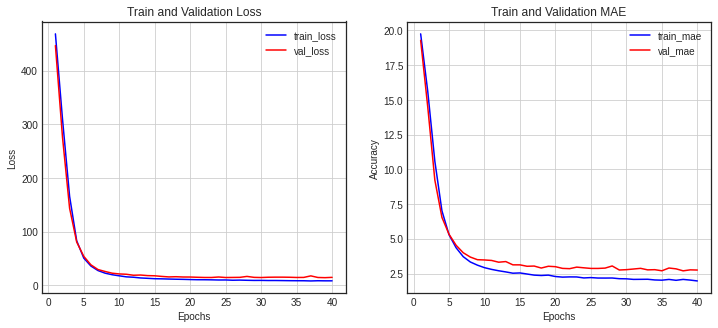

In [105]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측 

In [106]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_met_mae = model.evaluate(test_data,test_labels)
print("test_loss: ", test_loss)
print("test_met_mae: ", test_met_mae)

4/4 [==============================] - 0s 2ms/step - loss: 23.5088 - mae: 2.9584
test_loss:  23.508813858032227
test_met_mae:  2.9583561420440674


## 10-3. Reuters 딥러닝 모델

### 데이터 로드 및 전처리


In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [108]:
(train_data_full, train_labels_full), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, train_data_val, train_labels,train_labels_val = train_test_split(train_data_full, train_labels_full,
                                                            test_size=0.25,
                                                            random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print("전체 훈련 데이터: ",len(train_data_full))
print("실제 훈련 데이터: ", len(train_data))
print("검증 훈련 데이터: ", len(train_data_val))
print("테스트 데이터: ", len(test_data))
print("label 갯수: ", len(set(train_labels)))

전체 훈련 데이터:  8982
실제 훈련 데이터:  6736
검증 훈련 데이터:  2246
테스트 데이터:  2246
label 갯수:  46


In [109]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data),dim))
  for i,d in enumerate(data):
    results[i,d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(train_data_val)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)
y_val = utils.to_categorical(train_labels_val)

### 모델 구성 및 컴파일

In [110]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [111]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)               512       
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
activation_11 (Activation)   (None, 128)             

### 모델 학습


In [112]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('reuters.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
211/211 [==============================] - 2s 7ms/step - loss: 1.9206 - accuracy: 0.5720 - val_loss: 1.4573 - val_accuracy: 0.7017
Epoch 2/60
211/211 [==============================] - 1s 5ms/step - loss: 1.2940 - accuracy: 0.6991 - val_loss: 1.2102 - val_accuracy: 0.7440
Epoch 3/60
211/211 [==============================] - 1s 5ms/step - loss: 1.0850 - accuracy: 0.7487 - val_loss: 1.2139 - val_accuracy: 0.7462
Epoch 4/60
211/211 [==============================] - 1s 5ms/step - loss: 0.9826 - accuracy: 0.7770 - val_loss: 1.2142 - val_accuracy: 0.7596
Epoch 5/60
211/211 [==============================] - 1s 5ms/step - loss: 0.8789 - accuracy: 0.7947 - val_loss: 1.2145 - val_accuracy: 0.7631
Epoch 6/60
211/211 [==============================] - 1s 5ms/step - loss: 0.8098 - accuracy: 0.8113 - val_loss: 1.2612 - val_accuracy: 0.7671
Epoch 7/60
211/211 [==============================] - 1s 5ms/step - loss: 0.7583 - accuracy: 0.8202 - val_loss: 1.2803 - val_accuracy: 0.7801
Epoch 

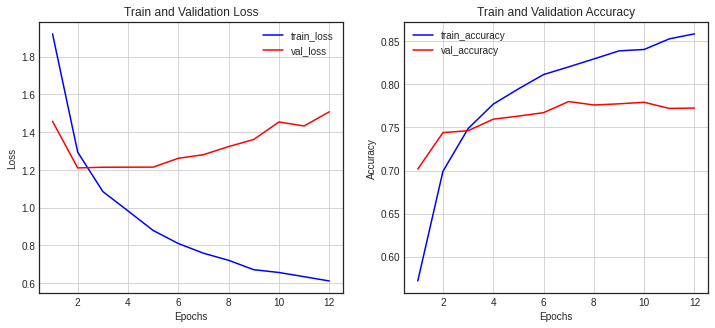

In [113]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [114]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_met_acc = model.evaluate(x_test,y_test)
print("test_loss: ", test_loss)
print("test_met_acc: ", test_met_acc)

71/71 [==============================] - 0s 2ms/step - loss: 1.2238 - accuracy: 0.7360
test_loss:  1.2238413095474243
test_met_acc:  0.7359750866889954


## 10-4. CIFAR10 딥러닝 모델

### 데이터 로드 및 전처리

In [115]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [116]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(train_data_full, train_labels_full), (test_data, test_labels) = cifar10.load_data()
train_data, train_data_val, train_labels,train_labels_val = train_test_split(train_data_full, train_labels_full,
                                                            test_size=0.2,
                                                            random_state=101)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(train_data_full.shape, train_labels_full.shape))
print("학습 데이터: {} 레이블: {}".format(train_data.shape, train_labels.shape))
print("검증 데이터: {} 레이블: {}".format(train_data_val.shape,train_labels_val.shape))
print("테스트 데이터: {} 레이블: {}".format(test_data.shape, test_labels.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [117]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

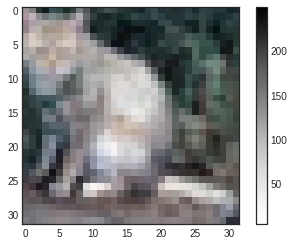

In [118]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.show()

In [119]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(train_data.shape)
print(train_data_val.shape)
print(test_data.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [120]:
train_data = train_data.reshape(-1,32*32*3)
train_data_val = train_data_val.reshape(-1,32*32*3)
test_data = test_data .reshape(-1,32*32*3)

print(train_data.shape)
print(train_data_val.shape)
print(test_data.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [121]:
train_data = train_data / 255.
train_data_val = train_data_val / 255.
test_data = test_data / 255.

In [122]:
model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Dense(512,name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [123]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [124]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 512)               1573376   
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
activation_12 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 1,580,554
Trainable params: 1,579,530
Non-trainable params: 1,024
_________________________________________________________________


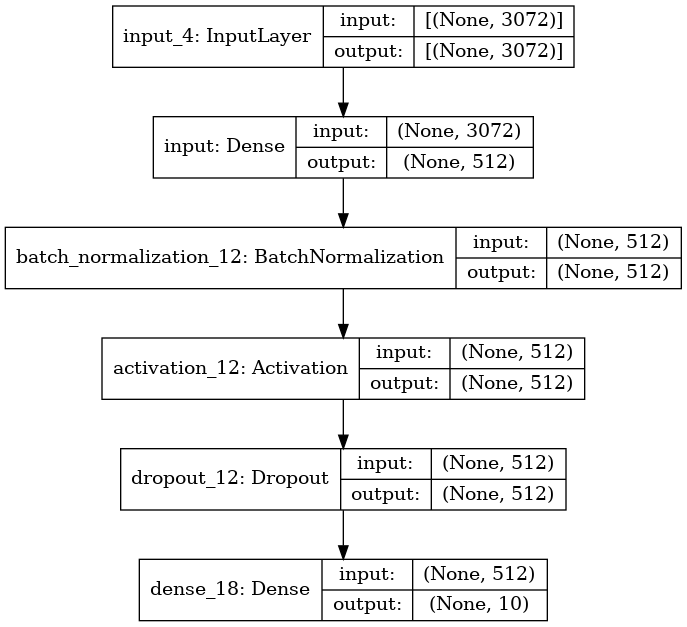

In [125]:
utils.plot_model(model, show_shapes=True)

### 모델 학습

In [126]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
check_point_cb = callbacks.ModelCheckpoint('cifar10.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(train_data, train_labels, epochs=40,
                    validation_data=(train_data_val, train_labels_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
1250/1250 [==============================] - 5s 3ms/step - loss: 1.9810 - accuracy: 0.3045 - val_loss: 1.9990 - val_accuracy: 0.2723
Epoch 2/40
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8476 - accuracy: 0.3492 - val_loss: 1.7675 - val_accuracy: 0.3900
Epoch 3/40
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8079 - accuracy: 0.3665 - val_loss: 1.8334 - val_accuracy: 0.3462
Epoch 4/40
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7825 - accuracy: 0.3754 - val_loss: 1.7276 - val_accuracy: 0.4027
Epoch 5/40
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7556 - accuracy: 0.3852 - val_loss: 1.8493 - val_accuracy: 0.3624
Epoch 6/40
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7302 - accuracy: 0.3920 - val_loss: 1.6906 - val_accuracy: 0.4135
Epoch 7/40
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7076 - accuracy: 0.4024 - val_loss: 1.6823 - val_accuracy:

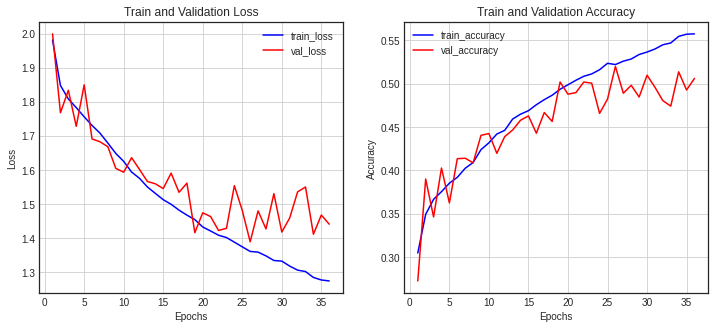

In [127]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [128]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
test_loss, test_met_acc = model.evaluate(test_data,test_labels)
print("test_loss: ", test_loss)
print("test_met_mae: ", test_met_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.3935 - accuracy: 0.5112
test_loss:  1.3934879302978516
test_met_mae:  0.5112000107765198
